<a href="https://colab.research.google.com/github/Ayush-ds-phy/ecommerce-book-purchase-prediction/blob/main/E_commerce_Book_Purchase_Prediction_%E2%80%93_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#📦 Libraries Importing for Data Scrapping, Maipulation and Visualization
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [145]:
#🌐 Web Scraping

url= "https://books.toscrape.com/catalogue/page-{}.html"

book_data=[]
for p_no in range(1,6):
    page_url=url.format(p_no)
    response= requests.get(page_url)
    soup = BeautifulSoup(response.text,'html.parser')
    books = soup.find_all('article',class_='product_pod')
    for book in books:
      Title=book.h3.a['title']
      Rating=book.p['class'][1].strip()
      Price=book.find('p',class_='price_color').text.strip('Â£')
      avalability=book.find('p',class_='instock availability').text.strip()
      book_data.append({"Title": Title,"Rating": Rating,"Price": float(Price),"Avalability": avalability})
df=pd.DataFrame(book_data)
print(df.head())


                                   Title Rating  Price Avalability
0                   A Light in the Attic  Three  51.77    In stock
1                     Tipping the Velvet    One  53.74    In stock
2                             Soumission    One  50.10    In stock
3                          Sharp Objects   Four  47.82    In stock
4  Sapiens: A Brief History of Humankind   Five  54.23    In stock


In [146]:
#🧼 Data Check Before Analysis
print("----------info-----------")
print(df.info())
print ()
print("----------describe-----------")
print(df.describe())
print ()
print("----------checking for null values-----------")
print(df.isnull().sum())
print ()
print("----------checking duplicates-----------")
print(df.duplicated().sum())

----------info-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        100 non-null    object 
 1   Rating       100 non-null    object 
 2   Price        100 non-null    float64
 3   Avalability  100 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

----------describe-----------
            Price
count  100.000000
mean    34.560700
std     14.638531
min     10.160000
25%     19.897500
50%     34.775000
75%     47.967500
max     58.110000

----------checking for null values-----------
Title          0
Rating         0
Price          0
Avalability    0
dtype: int64

----------checking duplicates-----------
0


In [147]:
#Mapping text data to numeric visa versa
rating_map= {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5 }
df['Rating']=df['Rating'].map(rating_map)
print(df.head())
df.drop_duplicates(inplace=True)
expensive_map={0:'Not Expensive',
               1:'Expensive'
               }

                                   Title  Rating  Price Avalability
0                   A Light in the Attic       3  51.77    In stock
1                     Tipping the Velvet       1  53.74    In stock
2                             Soumission       1  50.10    In stock
3                          Sharp Objects       4  47.82    In stock
4  Sapiens: A Brief History of Humankind       5  54.23    In stock


In [148]:
# Processing Some essential data manually

df['expensive']=(df['Price']>df['Price'].median()).astype(int)
def sim_purchased(row):
  if (row['Price']<=40 and row['Rating'] >= 3):
    return 1
  elif(row['Price']<=30 and row['Rating'] >= 2):
    return np.random.choice([0,1],p=[0.6,0.4])
  else:
    return 0

df['purchased']=df.apply(sim_purchased,axis=1)
def quantity(row):
  if row['purchased'] == 1:
      return np.random.choice([1,2,3,4,5],p=[0.5,0.2,0.2,0.05,0.05])
  else :
      return 0
df['quantity_purchased']=df.apply(quantity,axis= 1)

df['Gender']=np.random.choice(['Male','Female'],size=len(df),p=[0.6,0.4])
df['added_to_cart']=np.random.choice([0,1,2,3,4,5],size=len(df),p=[0.05,0.2,0.1,0.2,0.05,0.4])
dfm=df.copy()                                                                                      #keeping a copy to implement ML
df['expensive']=df['expensive'].map(expensive_map)
print(df)
print(df['purchased'].value_counts(normalize=True))

                                                Title  Rating  Price  \
0                                A Light in the Attic       3  51.77   
1                                  Tipping the Velvet       1  53.74   
2                                          Soumission       1  50.10   
3                                       Sharp Objects       4  47.82   
4               Sapiens: A Brief History of Humankind       5  54.23   
..                                                ...     ...    ...   
95  Lumberjanes Vol. 3: A Terrible Plan (Lumberjan...       2  19.92   
96  Layered: Baking, Building, and Styling Spectac...       1  40.11   
97  Judo: Seven Steps to Black Belt (an Introducto...       2  53.90   
98                                               Join       5  35.67   
99          In the Country We Love: My Family Divided       4  22.00   

   Avalability      expensive  purchased  quantity_purchased  Gender  \
0     In stock      Expensive          0                   0   

In [162]:
sns.set(style="whitegrid")

print(df.describe())
print(df['purchased'].value_counts(normalize=True))
df.to_csv('books_dataset', index= False)
print(df.head())

           Rating       Price   purchased  quantity_purchased  added_to_cart
count  100.000000  100.000000  100.000000          100.000000     100.000000
mean     2.930000   34.560700    0.370000            0.750000       2.800000
std      1.423149   14.638531    0.485237            1.200799       1.723281
min      1.000000   10.160000    0.000000            0.000000       0.000000
25%      2.000000   19.897500    0.000000            0.000000       1.000000
50%      3.000000   34.775000    0.000000            0.000000       3.000000
75%      4.000000   47.967500    1.000000            1.000000       5.000000
max      5.000000   58.110000    1.000000            5.000000       5.000000
purchased
0    0.63
1    0.37
Name: proportion, dtype: float64
                                   Title  Rating  Price Avalability  \
0                   A Light in the Attic       3  51.77    In stock   
1                     Tipping the Velvet       1  53.74    In stock   
2                             S

Text(0.5, 0, 'Price in euros')

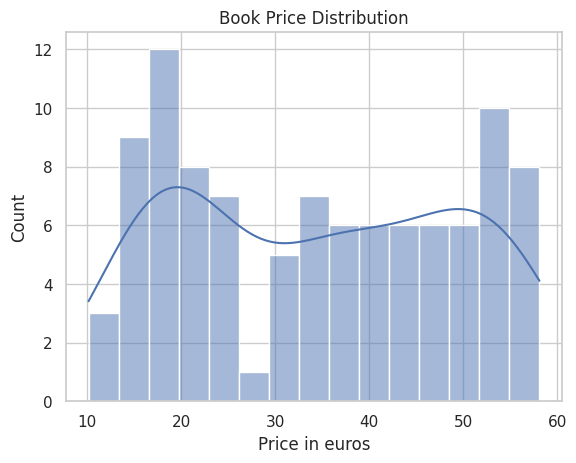

In [150]:
#📊 Plots
sns.histplot(df['Price'], kde=True, bins=15)
plt.title('Book Price Distribution')
plt.xlabel('Price in euros')

Text(0.5, 1.0, 'Book Ratings Count')

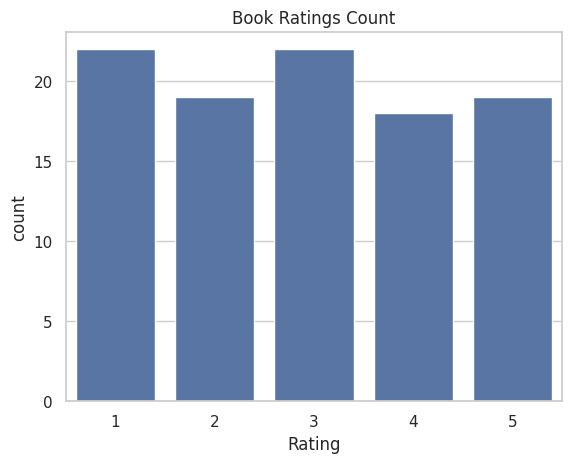

In [151]:
sns.countplot(df,x='Rating')
plt.title("Book Ratings Count")

Text(0.5, 0, 'Purchased Quantity')

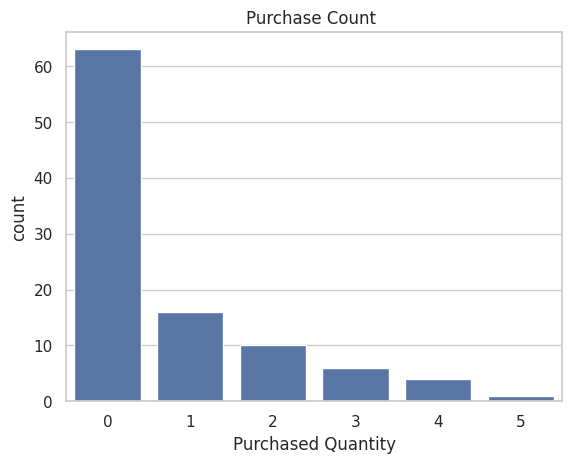

In [152]:
sns.countplot(x='quantity_purchased', data=df)
plt.title("Purchase Count ")
plt.xlabel("Purchased Quantity")

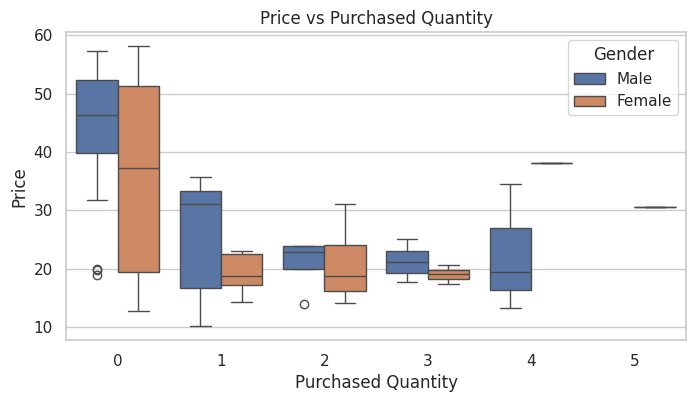

In [153]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='quantity_purchased', y='Price', data=df,hue='Gender')
plt.title("Price vs Purchased Quantity")
plt.xlabel("Purchased Quantity")
plt.show()

Text(0.5, 1.0, 'Aadded To Cart VS Purchased')

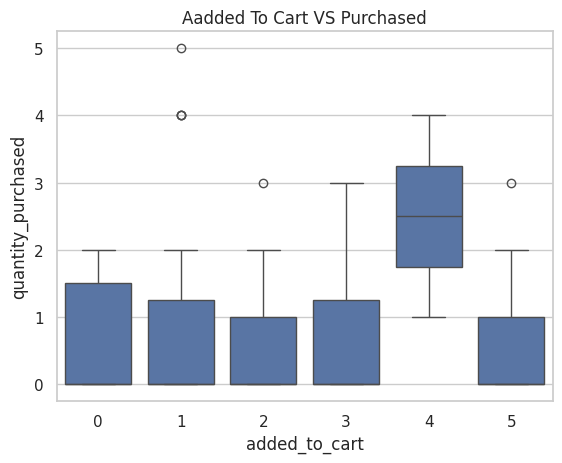

In [154]:
sns.boxplot(x='added_to_cart',y='quantity_purchased',data=df)
plt.title("Aadded To Cart VS Purchased")


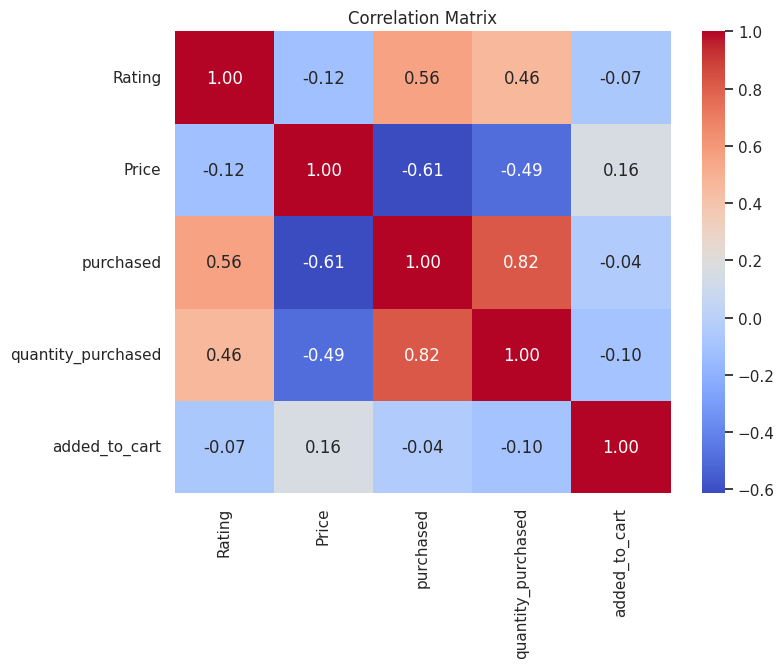

In [155]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

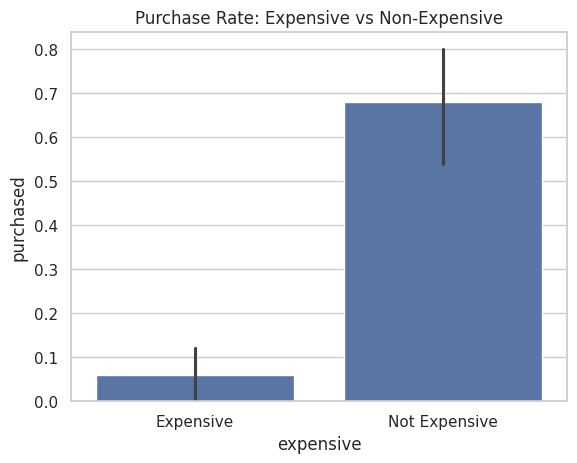

In [156]:
sns.barplot(x='expensive', y='purchased', data=df)
plt.title("Purchase Rate: Expensive vs Non-Expensive")
plt.show()

In [157]:
# Machine Learning Model
X=dfm[['added_to_cart','Price','Rating','expensive']]
Y=dfm['purchased']

X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=50)

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score,classification_report, confusion_matrix



In [159]:
# Model Tranning with random Forest
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
rf_preds=rf.predict(X_test)

print("\n---------- RandomForestClassifier-------------")
print(classification_report(Y_test, rf_preds))
print("\n Confustion Matrix:\n", confusion_matrix(Y_test, rf_preds))
print("\n Mean Squared Error: \n", mean_squared_error(Y_test, rf_preds))


---------- RandomForestClassifier-------------
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.89      0.94        27

    accuracy                           0.96        70
   macro avg       0.97      0.94      0.95        70
weighted avg       0.96      0.96      0.96        70


 Confustion Matrix:
 [[43  0]
 [ 3 24]]

 Mean Squared Error: 
 0.04285714285714286


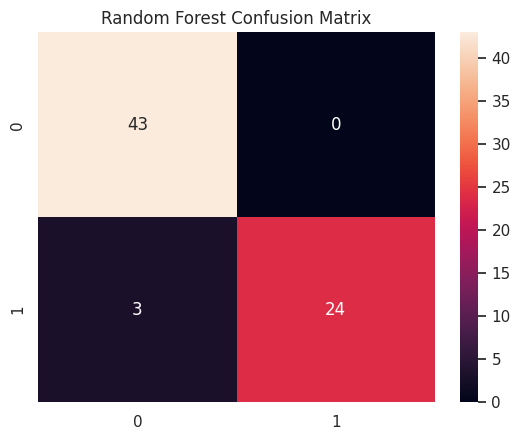

In [160]:
sns.heatmap(confusion_matrix(Y_test, rf_preds), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [161]:
#Saving Model
from joblib import dump
dump(rf, 'purchase_predictor.joblib')

['purchase_predictor.joblib']

In [163]:
from google.colab import files
files.download('books_dataset')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>